<a href="https://colab.research.google.com/github/shakebkhan/deeplearning/blob/main/SimpleNN_dropouts_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LAst amended: 2nd June, 2023
# Ref: https://www.kaggle.com/code/harnalashok/exercise-dropout-and-batch-normalization/edit
# Data Source: https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-01-21
# Spotify dataset

# About dropouts
overfitting is caused by the network learning spurious patterns in the training data. To recognize these spurious patterns a network will often rely on very a specific combinations of weight, a kind of "conspiracy" of weights. Being so specific, they tend to be fragile: remove one and the conspiracy falls apart.

This is the idea behind dropout. To break up these conspiracies, we randomly drop out some fraction of a layer's input units every step of training, making it much harder for the network to learn those spurious patterns in the training data. Instead, it has to search for broad, general patterns, whose weight patterns tend to be more robust.

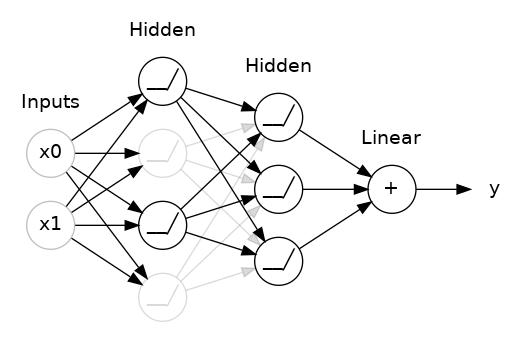

## Process data

In [1]:
# 1.0
import pandas as pd
from pathlib import Path

# 1.0.1
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

# 1.0.2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [2]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# 1.2
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
# 1.2.1
pathToFolder = "/gdrive/MyDrive/deeplearning/"

In [5]:
# 1.2.2
path = Path(pathToFolder) / "spotify.csv.zip"

In [6]:
# 2.0 Read data:

spotify = pd.read_csv(path)

In [7]:
# 2.1
spotify.shape  # (32833, 23)
spotify.head()

(32833, 23)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [8]:
# 2.2
X = spotify.copy().dropna()
y = X.pop('track_popularity')

In [9]:
# 3.0
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']

features_cat = ['playlist_genre']

In [ ]:
# 3.1 Set process pipeline:

preprocessor = make_column_transformer(
                                        (StandardScaler(), features_num),
                                        #(OneHotEncoder(), features_cat),
                                        )

In [11]:
ss=StandardScaler()

In [13]:
ss.fit_transform(spotify[features_num])

array([[ 0.64204909,  1.20161406,  0.1731999 , ...,  0.03190765,
         0.04292678, -0.51887357],
       [ 0.49041187,  0.64331701,  1.55762694, ...,  0.78252179,
        -0.77719826, -1.05626847],
       [ 0.13888922,  1.28452946, -1.21122713, ...,  0.43938389,
         0.11622657, -0.82201684],
       ...,
       [-0.86743053,  0.67648317,  0.1731999 , ..., -0.31980869,
         0.26420146, -0.26219288],
       [-0.19884823,  1.04683864, -0.93434172, ..., -0.86882932,
         0.26490769,  2.36712121],
       [-0.35737806,  1.02472786, -0.1036855 , ..., -1.80645361,
         0.26401561,  1.86686295]])

In [14]:
ss.fit(spotify[features_num])

StandardScaler()

In [19]:
data=ss.transform(X.loc[:,features_num])

What is GroupShuffleSplit()?<br>
See StackOverflow [here](https://stackoverflow.com/a/68983770) and [this page](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py) on different kinds of splits.

In [ ]:
# 4.0 Define function to split data
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

In [20]:
# 4.1 Split data:
from sklearn.model_selection import train_test_split
#X_train, X_valid, y_train, y_valid = group_split(X, y, artists)
X_train, X_valid, y_train, y_valid = train_test_split(data, y, test_size = 0.25)

In [ ]:
# 4.2
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100
y_valid = y_valid / 100


In [ ]:
# 4.3

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [12]


## Model without dropouts:

In [ ]:
# 5.0 Our 1st model:

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])


In [ ]:
# 5.1 Compile the model

model.compile(
    optimizer='adam',
    loss='mae',
)



In [ ]:
# 5.2 Fit the model:

history = model.fit(
                     X_train, y_train,
                     validation_data=(X_valid, y_valid),
                     batch_size=64,
                     epochs=50,
                     verbose=0,
                   )

In [ ]:
# 5.3 Examine results:

history_df = pd.DataFrame(history.history)


<Axes: >

Minimum Validation Loss: 0.1976


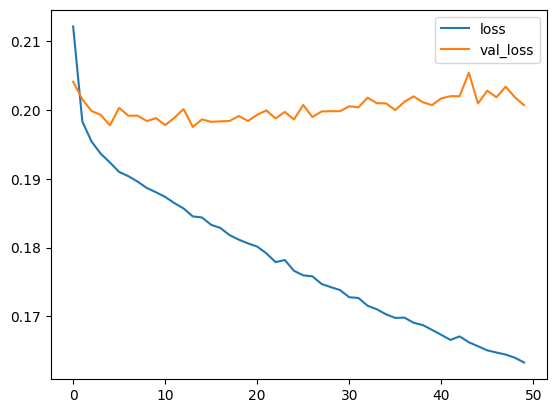

In [ ]:
# 5.4 Results:

history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

## Model with dropouts

In [ ]:
# 6.0 The model with Dropouts:

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])


In [ ]:
# 6.1 Compile the model:

model.compile(
    optimizer='adam',
    loss='mae',
)


In [ ]:
# 6.2 Fit and plot results:

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0,
)


<Axes: >

Minimum Validation Loss: 0.1961


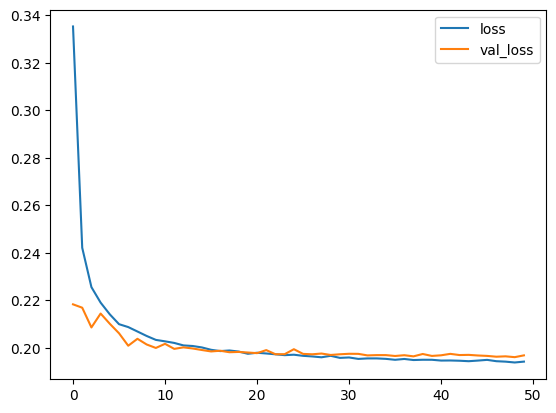

In [ ]:
# 6.2.1
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [ ]:
####### Done -------------------